In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import koreanize_matplotlib
import matplotlib.pyplot as plt


In [2]:
# 파일 불러오기 
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",encoding="cp949")

In [3]:
df.head(5)

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

Q1. 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!

In [3]:
# 연령대 딕션너리 
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [4]:
# 연령대코드사용하여 연령대 컬럼 만들기 
df['연령대'] = [age_code[code] for code in df['연령대코드(5세단위)']]
df.head(5)

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126,60~64세
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126,35~39세
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126,35~39세
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126,55~59세
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126,35~39세


In [5]:
# 연령대와 허리둘레 활용하여 기술통계 만들기 
df.groupby('연령대')['허리둘레'].describe().reset_index()

,연령대,count,mean,std,min,25%,50%,75%,max
0,20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
1,25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
2,30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
3,35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
4,40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
5,45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
6,50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
7,55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
8,60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0
9,65~69세,53624.0,83.588500,8.443542,50.0,78.0,83.5,89.0,129.0


Q2. "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

In [6]:
# 음주여부, 흡연상태, 연령대코드, 성별코드 데이터 가져오기
df1 = df[["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]]
df1.head(5)

,음주여부,흡연상태,연령대코드(5세단위),성별코드
0,0.0,3.0,13,1
1,0.0,1.0,8,2
2,0.0,1.0,8,1
3,1.0,1.0,12,2
4,0.0,3.0,8,1


In [7]:
df1.describe()

,음주여부,흡연상태,연령대코드(5세단위),성별코드
count,999475.000000,999840.000000,1000000.000000,1000000.000000
mean,0.497007,1.606411,10.539593,1.468828
std,0.499991,0.817844,2.860117,0.499028
min,0.000000,1.000000,5.000000,1.000000
25%,0.000000,1.000000,8.000000,1.000000
50%,0.000000,1.000000,11.000000,1.000000
75%,1.000000,2.000000,13.000000,2.000000
max,1.000000,3.000000,18.000000,2.000000


In [8]:
corr = df1.corr()
corr

,음주여부,흡연상태,연령대코드(5세단위),성별코드
음주여부,1.000000,0.352014,-0.283296,-0.368630
흡연상태,0.352014,1.000000,-0.125714,-0.588491
연령대코드(5세단위),-0.283296,-0.125714,1.000000,0.080093
성별코드,-0.368630,-0.588491,0.080093,1.000000


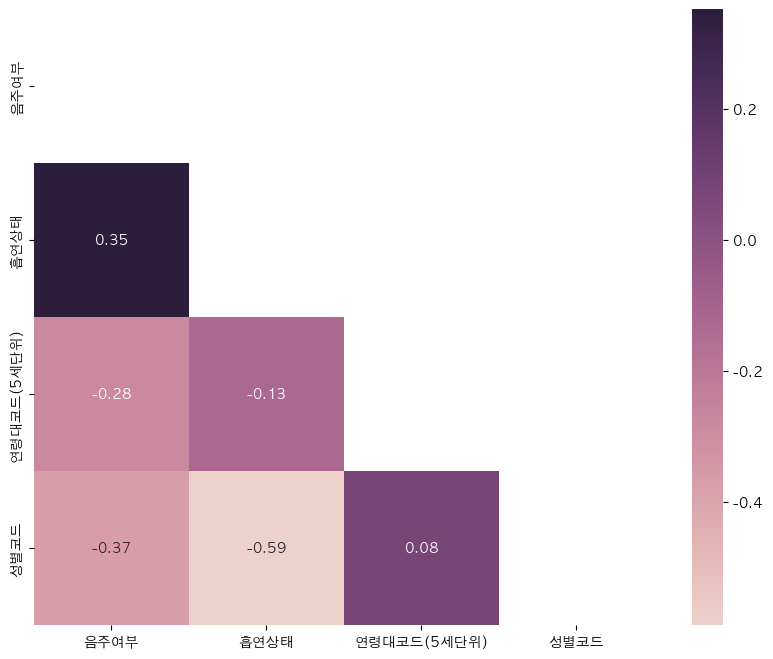

In [9]:
#  heatmap 만들기 
mask = np.triu(np.ones_like(df1.corr()))


plt.rc('font', family = "AppleGothic")
plt.figure(figsize = (10,8))

sns.heatmap(corr,annot = True, mask = mask, cmap=sns.cubehelix_palette(as_cmap=True))

plt.show()

Q3. 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?

건강보험에서 제공하고 있는 데이터는 용량을 줄이기 위해 대부분의 데이터를 숫자 형태로 제공하고 있습니다. replace 기능을 사용하면 딕셔너리의 값을 의미하는 문자 형태로 변경해 볼 수 있습니다. 다음 제공되는 딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경한 뒤 전체 데이터에서 음주와 흡연에 대한 교차 테이블을 구해 각 해당 빈도수를 구하고 시각화 해주세요!

In [12]:
df["흡연상태"].value_counts()

흡연상태
1.0    608587
3.0    215061
2.0    176192
Name: count, dtype: int64

In [13]:
df["음주여부"].value_counts()

음주여부
0.0    502729
1.0    496746
Name: count, dtype: int64

In [10]:
# 새 컬럼 만들기 
df["흡연"] = df["흡연상태"]
df["음주"] = df["음주여부"]

# 데이터 이름 바꾸기 
df["흡연"] = df["흡연"].replace({1.0 : "흡연안함", 2.0 : "끊음", 3.0 : "흡연중"})
df["음주"] = df["음주"].replace({0.0: "안마심", 1.0: "마심"})

In [14]:
# 흡연, 음주 데이터 가져오기 
df3 = df[["흡연","음주"]]
df3.head(5)

,흡연,음주
0,흡연중,안마심
1,흡연안함,안마심
2,흡연안함,안마심
3,흡연안함,마심
4,흡연중,안마심


In [16]:
df5 = pd.crosstab(df3["음주"],df3["흡연"]).reset_index().rename_axis(None,axis =1)
df5

,음주,끊음,흡연안함,흡연중
0,마심,120779,213743,162166
1,안마심,55334,394503,52845


In [18]:
# 교차 분석표 만들기
df4 = pd.crosstab(df3["흡연"],df3["음주"])
df4

음주,마심,안마심
흡연,,
끊음,120779,55334
흡연안함,213743,394503
흡연중,162166,52845


In [19]:
# 컬럼 순서 바꾸기
act =(["안마심","마심"])
smoke = (["흡연중","흡연안함","끊음"])
df8 = df4[act].reindex(smoke, axis = 0)


df8

음주,안마심,마심
흡연,,
흡연중,52845,162166
흡연안함,394503,213743
끊음,55334,120779


    음주      끊음    흡연안함     흡연중
0   마심  120779  213743  162166
1  안마심   55334  394503   52845


<Axes: xlabel='흡연'>

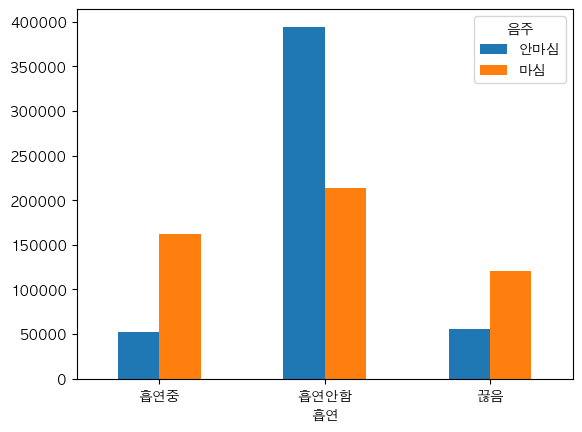

In [20]:
# 막대차트 
print(df5)
df8.plot.bar(rot = 0)

Q4. 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

체중이 120Kg 이 넘는다면 비만으로 건강관리가 필요합니다. 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요! (이때 120Kg 도 포함되게 구합니다.) 그래프의 설정과 seaborn 버전에 따라 여백이나 회귀선의 시작과 끝점에 차이가 있을 수 있습니다.

In [13]:
df.head(5)

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대,흡연,음주
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,1,NaN,NaN,NaN,NaN,1.0,20181126,60~64세,흡연중,안마심
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,1,NaN,NaN,NaN,NaN,1.0,20181126,35~39세,흡연악함,안마심
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,1,NaN,NaN,NaN,NaN,0.0,20181126,35~39세,흡연악함,안마심
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,0,NaN,NaN,NaN,NaN,NaN,20181126,55~59세,흡연악함,마심
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,0,NaN,NaN,NaN,NaN,NaN,20181126,35~39세,흡연중,안마심


In [16]:
# 120 이상인 체중 데이터 가져오기 
wf = df[df["체중(5Kg 단위)"] >= 120.0]
wf

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대,흡연,음주
1219,2017,1220,2,6,41,170.0,120.0,116.0,0.7,0.9,...,0,NaN,NaN,NaN,NaN,NaN,20181126,25~29세,흡연중,안마심
2309,2017,2310,1,6,30,190.0,155.0,127.0,0.8,0.9,...,1,NaN,NaN,NaN,NaN,1.0,20181126,25~29세,흡연중,안마심
3497,2017,3498,1,7,46,175.0,120.0,119.0,1.2,1.2,...,0,NaN,NaN,NaN,NaN,NaN,20181126,30~34세,흡연중,마심
3685,2017,3686,1,7,30,180.0,140.0,127.0,1.5,1.5,...,1,NaN,NaN,NaN,NaN,0.0,20181126,30~34세,끊음,안마심
5788,2017,5789,1,8,41,175.0,140.0,124.0,1.0,1.0,...,0,NaN,NaN,NaN,NaN,NaN,20181126,35~39세,흡연안함,안마심
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996544,2017,996545,1,8,41,175.0,125.0,121.0,1.2,1.2,...,1,NaN,NaN,NaN,NaN,1.0,20181126,35~39세,흡연중,마심
996828,2017,996829,1,6,47,180.0,120.0,109.0,1.5,1.5,...,1,NaN,NaN,NaN,NaN,1.0,20181126,25~29세,흡연중,마심
997152,2017,997153,1,5,47,180.0,120.0,115.0,0.7,0.8,...,0,NaN,NaN,NaN,NaN,NaN,20181126,20~24세,흡연안함,안마심
997414,2017,997415,1,7,46,170.0,135.0,129.0,1.0,1.2,...,0,NaN,NaN,NaN,NaN,NaN,20181126,30~34세,흡연중,안마심


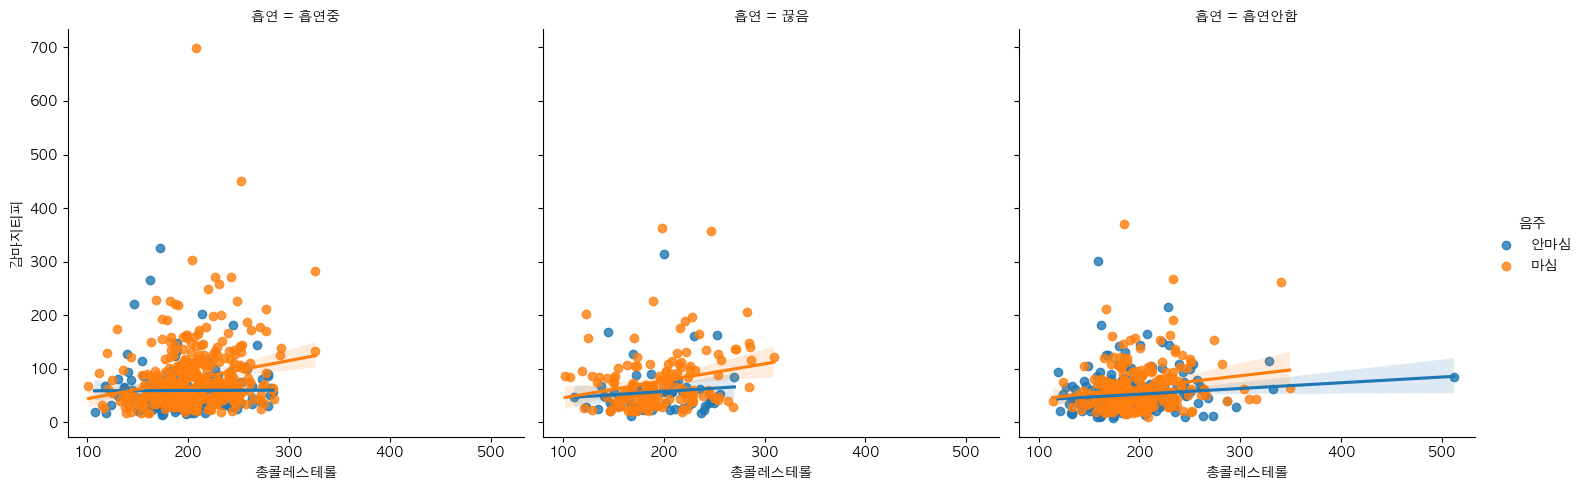

In [17]:
# 휘귀선&플롯 차트 만들기 
g = sns.lmplot(data = wf, x = "총콜레스테롤", y = "감마지티피", hue = "음주", col = "흡연")

Q5. 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!

시력은 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기합니다.

실명인 데이터를 평균에 포함하게 되면 시력에 대한 평균을 제대로 구하기 어렵습니다. 실명 데이터를 제외하고 연령대, 성별에 따른 평균 좌우 시력을 구해주세요!

서브플롯으로 시각화하여 표현해 주고 matplotlib 에 대한 사용법은 다음의 영상도 함께 참고해 주세요! (https://www.youtube.com/watch?v=ZTRKojTLE8M)

시각화 예시는 참고사항으로 스타일이나 폰트 구성이 달라도 연령대, 성별 좌우평균시력을 시각화 하면 됩니다.

In [18]:
# 시력(좌), 시력(우) 데이터로 나누기 
left = df[['시력(좌)','연령대','성별코드']]
right = df[['시력(우)','연령대','성별코드']]

/var/folders/8f/xt_fjqzx5n19d61dsmb06v400000gn/T/ipykernel_934/2003696246.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot( data = left, x = '시력(좌)', y = '연령대', hue = '성별코드', ci = None, ax = ax[0])
/var/folders/8f/xt_fjqzx5n19d61dsmb06v400000gn/T/ipykernel_934/2003696246.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot( data = right, x = '시력(우)', y = '연령대', hue = '성별코드', ci = None, ax = ax[1])


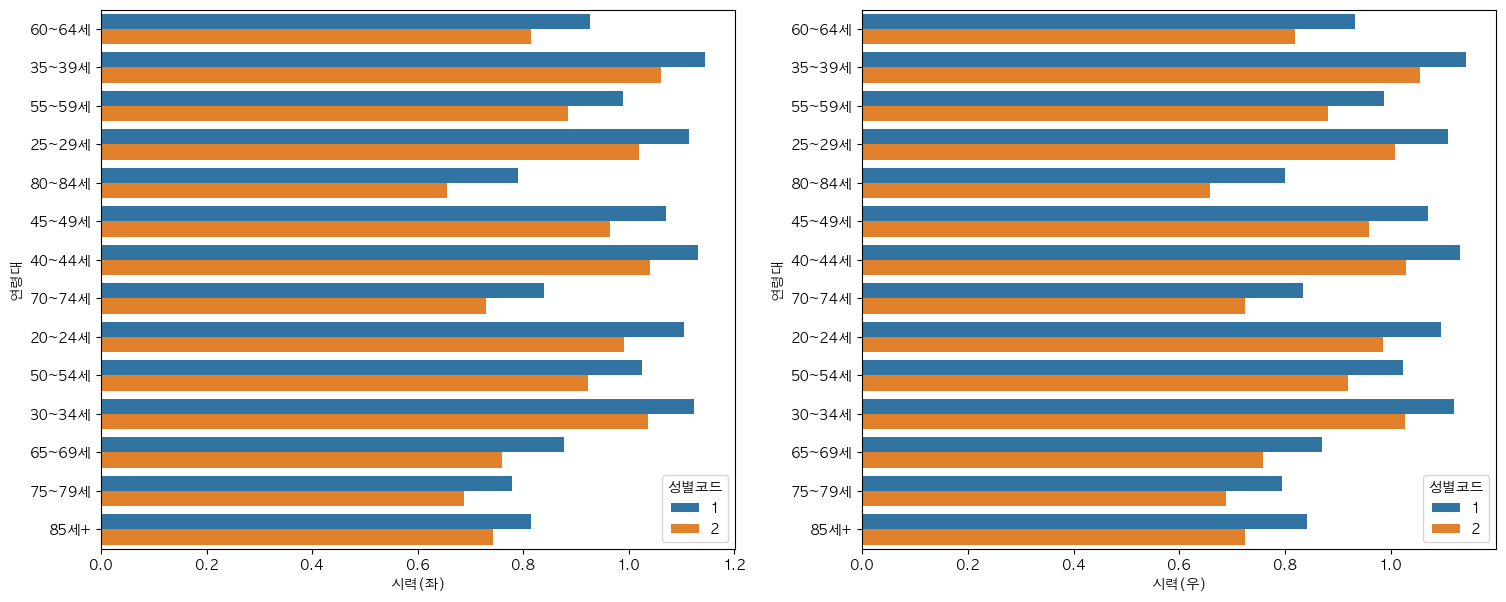

In [19]:
# 막대 차트 그리기 
fig, ax = plt.subplots(ncols=2, figsize = (18,7))
sns.barplot( data = left, x = '시력(좌)', y = '연령대', hue = '성별코드', ci = None, ax = ax[0])
sns.barplot( data = right, x = '시력(우)', y = '연령대', hue = '성별코드', ci = None, ax = ax[1])
plt.show()